- We are trying to figure out the best consulates to apply for to have the highest odds for receiving a uniform visa in general, or a multiple entry visa (MEV)
- You need to test whether in there is a better chance of getting a visa if you apply to a particular consulate within that country or is it by chance.
- Alternate Hypothesis: We have a better chance of getting a Visa if you apply to a particular consulate within that country
- Null Hypothesis: There is no significant difference between a specific consulate over all other consulates and that these numbers could have come through chance



### Statistical Significance

##### Basics of Hypothesis Testing
- Null Hypothesis: Population = #, Mean = #, Std Dev = #
- Alt Hypothesis: Proportion <=> #, Mean <=> #, Std Dev <=> #

If Alt Hypothesis has < then our normal ditribution will be left tailed. If > then right tailed and if not equal then two tailed

##### T-Test Statistics (Z-Score, T-Value)
Link: https://www.youtube.com/watch?v=pTmLQvMM-1M

- Want to compare two populations(Distributions)
- Both should be like normal distributions (Draw Histograms and Curve and Mean Line)
- This only tells that the mean is different(Could have different distributions) but doesnt tell if statistically significant difference between the two or not
- T Value is really a signal to noise ratio, signal telling me the difference between the two samples and noise is going to be the numbers that get in the way
- Signals/Noise = Diff b/w the group mean/Variability of groups
- Standard Dev squared is the Variance. and when we divide by the variance we wont get any noise
- = |mean_1 - mean_2|/ sqrt[(sd_1^2/n) +(sd_2^2/n)]
- if I get a T Value higher than 1 that means I have more noise than my signal
- But we want to knpw the t test which will tell if a Null Hypothesis is statistiaclly significant or not.
- If get a T Value greater than our Critical Value we reject the Null Hypothesis
- If want to find through P value method then we look through the T Table which give asks for DOf and T Value and gives the P value
- DoF = number of samples from field 1 + number of samples from field 2 - 2
- If T Value is higher than my P Value from the T Table then we reject the Null Hypothesis, that means there is something statistically significant between these 2 sample sets

- If do T test in Excel or Python we get the P Value, if it is less than alpha value we reject the Null Hypothesis|

##### Traditional Method
Rely on a test-statistic (z-score)
For e.g if depends on Proportion z = p_hat-p/sqrt(pq/n)
For e.g if depends on Mean z = xbar - mew/(stddev/sqrt(n))

Critical Values (not used in P Value method)
* if alpha = 5% and have a right tailed test, then all our significance lies on the right side
* Then from Z Table we find that the z score at that alpha value is 1.645
* If have a right tailed test and the test statistic is less than the critical value the we fail to reject the null hypothesis
* z score = 1.5 and c.value = 1.645 (Cause alpha is 0.05)

##### P - Value Method
Link: https://www.youtube.com/watch?v=cW16A7hXbTo

Rely on a test-statistic (z-score)
For e.g if depends on Proportion z = p_hat-p/sqrt(pq/n)
For e.g if depends on Mean z = xbar - mew/(stddev/sqrt(n))

* In this we dont use the C.Value, we calculate the Test Statistic and then calculate the area to its right if it is right tailed.
* The P Value is the area or probability of the Normal Distribution that get by seeing the corresponding test statistic in P-Value Table
* This Area is our P-Value and we compare this with our Alpha and if right tailed we check if P Value is lower than our alpha Value we reject the Null Hypothesis 
* If the P-Value is lower than the Alpha Value then we reject the Null Hypothesis for right tailed test

##### Significance Level
When doing hypothesis testing, we have to choose a significance level as a threshold 
for how much of a chance we're willing to accept. This significance level is typically called alpha (Critical value) Typically 0.1, 0.01, 0.05

A T test is one way to compare the means of two different populations
Will compare two independent samples to see if they have different means

The result is a statistics and a p-value. 
P-value is much greater than 0.05 thus we cant reject the null hypothesis

When a data scientist run many tests in this way, it's called p-hacking or dredging 
and it's a serious methodological issue. P-hacking results in spurious correlations 
instead of generalizable results.

Remedies:

1) Bonferroni Correction: If alpha = 0.05, and running 3 datas divide 0.05 by 3 and that is new alpha

2) Hold Out Sets: Test on half of each data, make new hypothesis, then test on rest of data
aka Cross Fold Validation

# Sampling and Hypothesis Testing

In [96]:
#Libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_1samp
import seaborn as sns
import os

# Visa Shopping

Visa shopping: It is where someone would apply in a specific consulate in order to have higher odds of getting the visa or getting a higher tier visa in general. The idea itself seemed to have a lot of rumours around it and the only way to consider it a myth/reality is by doing proper analysis over real data. Luckily, the data is here.

# Your job is to appropriately sample and run hypothesis testing to prove/disprove whether Visa-shopping is real. 

We are trying to figure out the best consulates to apply for to have the highest odds for receiving a uniform visa in general, or a multiple entry visa (MEV) in particular.

In [97]:
df = pd.read_csv("2018-data-for-consulates.csv")
display(df.head())
df.isnull().sum()

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV),Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


Schengen State                                                                      13
Country where consulate is located                                                  13
Consulate                                                                           10
Airport transit visas (ATVs) applied for                                          1530
 ATVs issued (including multiple)                                                 1573
Multiple ATVs issued                                                              1774
ATVs not issued                                                                   1802
Not issued rate for ATVs                                                          1803
Uniform visas applied for                                                           14
Total  uniform visas issued (including MEV) \n                                      54
Multiple entry uniform visas (MEVs) issued                                         147
Share of MEVs on total number of uniform vi

# Data Cleaning: 


It is a good technique to strip column names of trailing white spaces and "\n" characters. Do that in the cell provided below.
- Rename columns with white spaces for e.g. "Schengen State': 'sch_state'"
- Look into df.strip()

In [98]:
import re
df = df.rename(columns=lambda x: x.strip())
df = df.rename(columns=lambda x: x.strip('\n'))
df = df.rename(columns=lambda x: re.sub('\s+','_',x))
df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Airport_transit_visas_(ATVs)_applied_for,ATVs_issued_(including_multiple),Multiple_ATVs_issued,ATVs_not_issued,Not_issued_rate_for_ATVs,Uniform_visas_applied_for,Total_uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,Total_ATVs_and_uniform_visas_applied_for,"Total_ATVs_and_uniform_visas_issued_(including_multiple_ATVs,_MEVs_and_LTVs)",Total_ATVs_and_uniform_visas_not_issued,Not_issued_rate_for_ATVs_and_uniform_visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


We are not interested in Airport Transit Visas (ATV). Drop all the columns involving ATVs for e.g. Multiple ATVs issued, ATVs not issued,

In [99]:
df = df.select(lambda x: not re.search('.*ATVs.*', x), axis=1)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  """Entry point for launching an IPython kernel.


,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total_uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,NaN,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%


# Missing Values

- Drop the rows where Schengen State is missing.
- Replace other missing values with zero.
- Print the summary for missing values after cleaning.

In [100]:
df = df[pd.notnull(df['Schengen_State'])]
print(len(df))
display(df['Schengen_State'].unique())

1900


array(['Austria', 'Belgium', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland'], dtype=object)

In [101]:
numericCols = ['Uniform_visas_applied_for',
       'Total_uniform_visas_issued_(including_MEV)',
       'Multiple_entry_uniform_visas_(MEVs)_issued',
       'Share_of_MEVs_on_total_number_of_uniform_visas_issued',
       'Total_LTVs_issued', 'Uniform_visas_not_issued',
       'Not_issued_rate_for_uniform_visas']
percCols = ['Share_of_MEVs_on_total_number_of_uniform_visas_issued','Not_issued_rate_for_uniform_visas']
intCols = list(set(numericCols).difference(percCols))

for each in intCols:
    df[each] = df[each].str.replace(',','')

df[percCols] = df[percCols].fillna('0%')
df[intCols] = df[intCols].fillna('0')
df[intCols] = df[intCols].astype('int64')
df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total_uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,0,0,0%
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%


In [102]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 1899
Data columns (total 10 columns):
Schengen_State                                           1900 non-null object
Country_where_consulate_is_located                       1900 non-null object
Consulate                                                1900 non-null object
Uniform_visas_applied_for                                1900 non-null int64
Total_uniform_visas_issued_(including_MEV)               1900 non-null int64
Multiple_entry_uniform_visas_(MEVs)_issued               1900 non-null int64
Share_of_MEVs_on_total_number_of_uniform_visas_issued    1900 non-null object
Total_LTVs_issued                                        1900 non-null int64
Uniform_visas_not_issued                                 1900 non-null int64
Not_issued_rate_for_uniform_visas                        1900 non-null object
dtypes: int64(5), object(5)
memory usage: 163.3+ KB


Schengen_State                                           0
Country_where_consulate_is_located                       0
Consulate                                                0
Uniform_visas_applied_for                                0
Total_uniform_visas_issued_(including_MEV)               0
Multiple_entry_uniform_visas_(MEVs)_issued               0
Share_of_MEVs_on_total_number_of_uniform_visas_issued    0
Total_LTVs_issued                                        0
Uniform_visas_not_issued                                 0
Not_issued_rate_for_uniform_visas                        0
dtype: int64

- Add columns of "decisions" and "rejection_rate"
- Decisions is total number of decisions taken - sum of visas issued, LTV's issued, Rejected
- Rejection rate is what percentage of *decisions* are rejected

In [103]:
display(df.iloc[0])

Schengen_State                                           Austria
Country_where_consulate_is_located                       ALBANIA
Consulate                                                 TIRANA
Uniform_visas_applied_for                                     62
Total_uniform_visas_issued_(including_MEV)                    32
Multiple_entry_uniform_visas_(MEVs)_issued                    10
Share_of_MEVs_on_total_number_of_uniform_visas_issued      31.3%
Total_LTVs_issued                                             21
Uniform_visas_not_issued                                       9
Not_issued_rate_for_uniform_visas                          14.5%
Name: 0, dtype: object

In [104]:
from decimal import Decimal
def rejectedPerc(x):
    try:
        val = Decimal((x['Uniform_visas_not_issued']/x['Decisions'])*100)
        return round(val,2)
    except:
        return '0.00%'
row = ['Total_uniform_visas_issued_(including_MEV)','Total_LTVs_issued','Uniform_visas_not_issued']
df['Decisions'] = df.apply(lambda x: np.sum(x[row[:]]), axis = 1)
df['Rejected (%)'] = df.apply(rejectedPerc, axis = 1)
df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total_uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,Decisions,Rejected (%)
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%,62,14.52
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%,2481,33.13
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,0,0,0%,16,0.00
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%,2776,4.39
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%,1976,4.00


# Hypothesis Testing

- We will be picking three countries.
- The three countries are Egypt, India and Japan.
- You need to test whether in there is a better _chance_ of getting a visa if you apply to a particukar consulate within that country or is it by chance.
- Add subheadings for each country

In order to answer this question correctly, we need to define the population and the sample we will use:
1. Population: Total number of applicants/rejects in all the country.
2. Sample: Total number of applicants/rejects in all the targeted consulates.
The null hypothesis, which is a prediction that there is no significant difference between a specific consulate over all other consulates and that these numbers could have happened out naturally due to fluctations in application qualities received.
In order to proceed with this, we need to make a rather **BIG** assumption, that all applications to all consulates have the same *average* quality or that they came from the same pool/population.




*Does this assumption make sense?*

_Write why or why not?_

- No the assumption doesnt make sense. Because we have to take alot of factors into consideration for example we here are making a huge assumption that all the quality of the visas are the same whereas it is nearly impossible to claim that all of these regions will output the same quality visa applications 

#  We can conduct this using univariate T-test.
You will use the scipy package.
This links will help you get started:
    - https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
    
    
You need to calculate the test statistic and choose an appropriate p-value. Mention why you think this is an appropriate p-value. Once you have the test statistic, you need to sample and test your hypothesis.
    

For each country:
   - Plot a piechart showing the consulates with the highest number of decisions.
   - You will be running your hypothesis tests w.r.t three attributes
       - Rejection rate (if you have a weak visa application)
       - Multi-Entry Visa Share (if you have a strong visa application)
       - Weighted Score: You are required to calculate a normalized engineered feature
           - (1-rejection_rate) * mevs_share
           - Normalize this score
        

You are required to submit an analysis of *EACH* country why you think your hypothesis were rejected/accepted. You can include geo-political factors in your report as well.

### Alternate Hypothesis: We have a better chance of getting a Visa if you apply to a particular consulate within that country
### Null Hypothesis: There is no significant difference between a specific consulate over all other consulates and that these numbers could have come through chance

#  Egypt

- Univariate statistical tests are those tests that involve one dependent variable

- scipy.stats.ttest_1samp(a, popmean, axis=0)
- Calculates the T-test for the mean of ONE group of scores.
- This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

In [105]:
df_Egypt = df[df['Country_where_consulate_is_located'] == 'EGYPT']
df_Egypt

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total_uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,Decisions,Rejected (%)
16,Austria,EGYPT,CAIRO,4993,4132,2872,69.5%,39,822,16.5%,4993,16.46
85,Belgium,EGYPT,CAIRO,3250,1946,464,23.8%,15,1111,34.2%,3072,36.17
170,Czech Republic,EGYPT,CAIRO,2713,2015,433,21.5%,3,693,25.5%,2711,25.56
243,Denmark,EGYPT,CAIRO,1790,1542,763,49.5%,1,238,13.3%,1781,13.36
295,Estonia,EGYPT,CAIRO,279,198,68,34.3%,7,74,26.5%,279,26.52
321,Finland,EGYPT,CAIRO,985,846,291,34.4%,0,131,13.3%,977,13.41
426,France,EGYPT,CAIRO,60165,45733,13514,29.5%,341,11941,19.8%,58015,20.58
587,Germany,EGYPT,CAIRO,38535,32848,26496,80.7%,315,5372,13.9%,38535,13.94
738,Greece,EGYPT,ALEXANDRIA,3210,2873,1633,56.8%,0,337,10.5%,3210,10.50
739,Greece,EGYPT,CAIRO,6606,5443,1502,27.6%,106,1057,16.0%,6606,16.00


#### Pie Chart Of Consulate Decisions

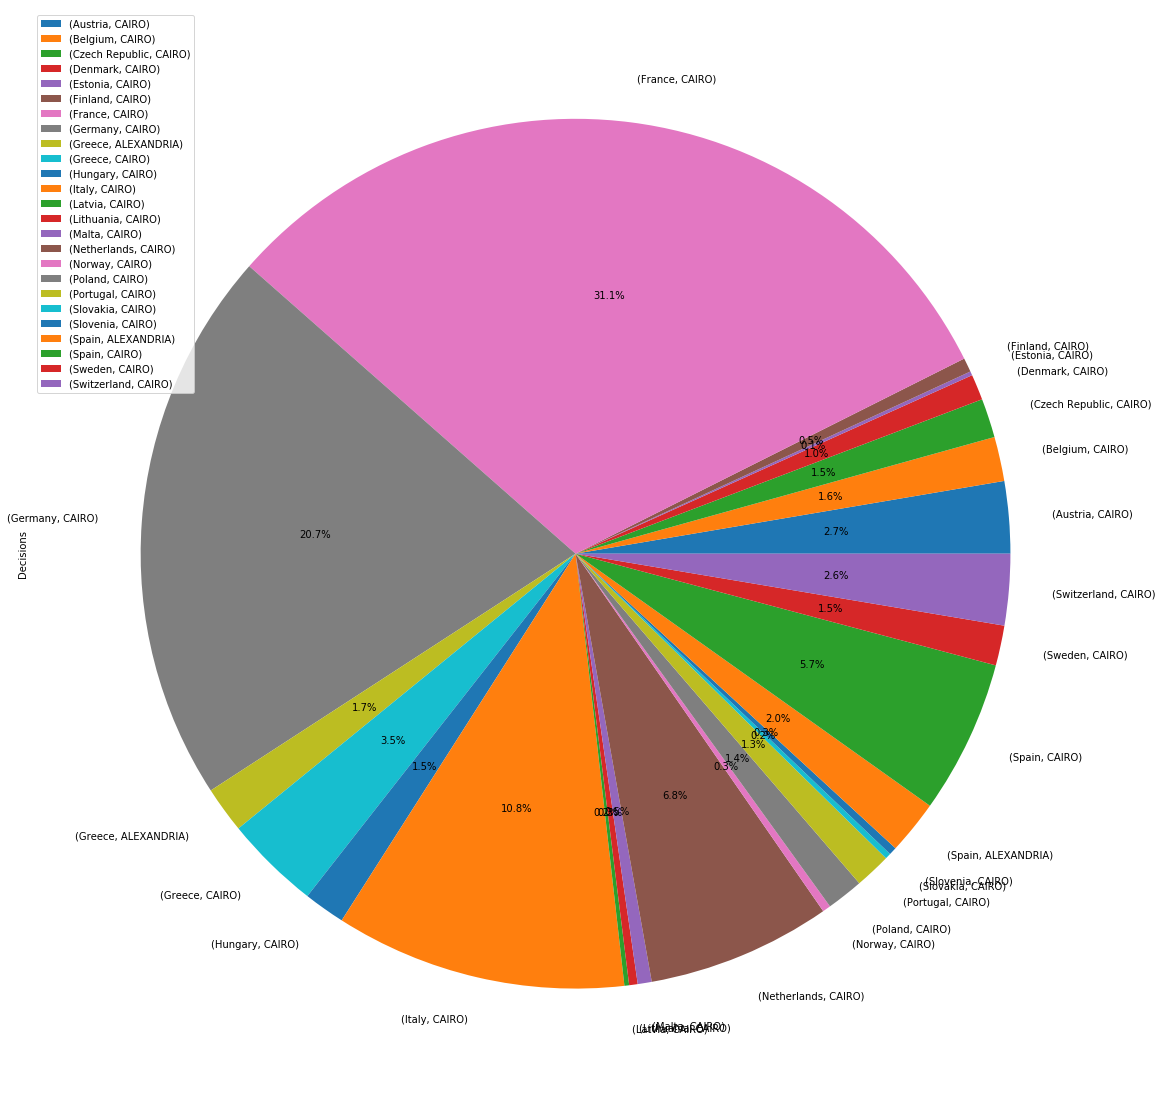

In [106]:
tempdf = df_Egypt.set_index(['Schengen_State','Consulate'])       
tempdf.plot.pie(y = 'Decisions', figsize = (20,20),autopct = '%1.1f%%')


#### Rejection rate (if you have a weak visa application)

In [107]:
from scipy.stats import ttest_1samp

def calculatePValue(dfTemp,numerator,divisor):
    rejected = []
    accepted = []
    PopulationMean = np.sum(dfTemp[numerator])/np.sum(dfTemp[divisor])
    print(PopulationMean)
    for i in range(len(dfTemp)):
        rej = dfTemp.iloc[i][numerator]
        acc = dfTemp.iloc[i][divisor] - rej
        countryArray = np.hstack((np.ones(rej), np.zeros(acc)))
        np.random.shuffle(countryArray)
        pvals = ttest_1samp(countryArray,PopulationMean)
        if pvals.pvalue < 0.005:
            rejected.append(dfTemp.iloc[i]['Schengen_State'] + ', '+ dfTemp.iloc[i]['Consulate'])
#                 display("Rejects The Null Hypothesis: ", country + ', '+ consulate,pvals)
        else:
            accepted.append(dfTemp.iloc[i]['Schengen_State'] + ', '+ dfTemp.iloc[i]['Consulate'])
#                 display("Fails To Reject the Null Hypothesis", country + ', '+ consulate,pvals)
    print('Rejects the Null Hypothesis: ')
    print(rejected)
    print('Fails to Reject the Null Hypothesis: ')
    print(accepted)

calculatePValue(df_Egypt,'Uniform_visas_not_issued','Decisions')

0.2031253350487831
Rejects the Null Hypothesis: 
['Austria, CAIRO', 'Belgium, CAIRO', 'Czech Republic, CAIRO', 'Denmark, CAIRO', 'Finland, CAIRO', 'Germany, CAIRO', 'Greece, ALEXANDRIA', 'Greece, CAIRO', 'Hungary, CAIRO', 'Italy, CAIRO', 'Lithuania, CAIRO', 'Malta, CAIRO', 'Netherlands, CAIRO', 'Norway, CAIRO', 'Poland, CAIRO', 'Portugal, CAIRO', 'Slovakia, CAIRO', 'Spain, ALEXANDRIA', 'Spain, CAIRO', 'Sweden, CAIRO', 'Switzerland, CAIRO']
Fails to Reject the Null Hypothesis: 
['Estonia, CAIRO', 'France, CAIRO', 'Latvia, CAIRO', 'Slovenia, CAIRO']


#### Multi-Entry Visa Share (if you have a strong visa application)

In [108]:
calculatePValue(df_Egypt,'Multiple_entry_uniform_visas_(MEVs)_issued','Total_uniform_visas_issued_(including_MEV)')

0.49557486086602415
Rejects the Null Hypothesis: 
['Austria, CAIRO', 'Belgium, CAIRO', 'Czech Republic, CAIRO', 'Estonia, CAIRO', 'Finland, CAIRO', 'France, CAIRO', 'Germany, CAIRO', 'Greece, ALEXANDRIA', 'Greece, CAIRO', 'Hungary, CAIRO', 'Italy, CAIRO', 'Latvia, CAIRO', 'Lithuania, CAIRO', 'Malta, CAIRO', 'Netherlands, CAIRO', 'Norway, CAIRO', 'Poland, CAIRO', 'Portugal, CAIRO', 'Slovenia, CAIRO', 'Spain, ALEXANDRIA', 'Spain, CAIRO', 'Sweden, CAIRO', 'Switzerland, CAIRO']
Fails to Reject the Null Hypothesis: 
['Denmark, CAIRO', 'Slovakia, CAIRO']


#### Weighted Score: You are required to calculate a normalized engineered feature

In [109]:
def weightedScore(rejectedRate, MEVshare):
    return (1-rejectedRate)*MEVshare

In [110]:
from sklearn.preprocessing import MinMaxScaler

def calculatePValuewithWeightedScore(dfTemp,first,second,third,fourth):
    
    normalize = []
    scaler = MinMaxScaler()
    for i in range(len(dfTemp)):
        rej = dfTemp.iloc[i][first]
        acc = dfTemp.iloc[i][second]
        Mevs = dfTemp.iloc[i][third]
        NotMevs = dfTemp.iloc[i][fourth]
        
            
        normalize.append([weightedScore(rej/acc, Mevs/NotMevs)])
    
    print(normalize)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    scaler.fit(normalize)
    scoreArray = [i for i in scaler.transform(normalize)]
    PopulationMean = np.mean(scoreArray)
    
    
    
    
    
    index = 0
    rejected = []
    accepted = []
    for i in range(len(dfTemp)):
          
            
        ws = scoreArray[index][0]
        decision = dfTemp.iloc[i]['Decisions']
        ones = int(ws*decision)
        zeros = decision - ones
        index+=1

        countryArray = np.hstack((np.ones(ones), np.zeros(zeros)))
        np.random.shuffle(countryArray)
        pvals = ttest_1samp(countryArray,PopulationMean)
        if pvals.pvalue < 0.005:
             rejected.append(dfTemp.iloc[i]['Schengen_State'] + ', '+ dfTemp.iloc[i]['Consulate'])
#                 display("Rejects The Null Hypothesis: ", country + ', '+ consulate,pvals)
        else:
            accepted.append(dfTemp.iloc[i]['Schengen_State'] + ', '+ dfTemp.iloc[i]['Consulate'])
#                 display("Fails To Reject the Null Hypothesis", country + ', '+ consulate,pvals)
    print('Rejects the Null Hypothesis: ')
    print(rejected)
    print('Fails to Reject the Null Hypothesis: ')
    print(accepted)
    
    
            
calculatePValuewithWeightedScore(df_Egypt,'Uniform_visas_not_issued','Decisions','Multiple_entry_uniform_visas_(MEVs)_issued','Total_uniform_visas_issued_(including_MEV)')

[[0.5806343789339926], [0.1522059138403563], [0.1599574566626363], [0.4286888332018839], [0.2523442308388545], [0.2978505629477994], [0.23467663092619598], [0.6941763773812574], [0.5087227414330218], [0.23179696954577672], [0.19923280961472256], [0.532572727659032], [0.2763215377894277], [0.2407188074331223], [0.06392673977508552], [0.6836945216756309], [0.2640984172557286], [0.13711805017209835], [0.2186077777777778], [0.4385964912280702], [0.7666666666666666], [0.08113868753300368], [0.026033791643348434], [0.13725253170659402], [0.47767700379506356]]
Rejects the Null Hypothesis: 
['Austria, CAIRO', 'Belgium, CAIRO', 'Czech Republic, CAIRO', 'Denmark, CAIRO', 'Estonia, CAIRO', 'France, CAIRO', 'Germany, CAIRO', 'Greece, ALEXANDRIA', 'Greece, CAIRO', 'Hungary, CAIRO', 'Italy, CAIRO', 'Lithuania, CAIRO', 'Malta, CAIRO', 'Netherlands, CAIRO', 'Norway, CAIRO', 'Poland, CAIRO', 'Portugal, CAIRO', 'Slovakia, CAIRO', 'Slovenia, CAIRO', 'Spain, ALEXANDRIA', 'Spain, CAIRO', 'Sweden, CAIRO', '

# INDIA

In [111]:
df_India = df[df['Country_where_consulate_is_located'] == 'INDIA']
df_India = df_India.drop([20]) # Mev Share is above 100%
df_India

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total_uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,Decisions,Rejected (%)
93,Belgium,INDIA,MUMBAI,19162,18360,15892,86.6%,0,551,2.9%,18911,2.91
94,Belgium,INDIA,NEW DELHI,7117,6052,4029,66.6%,0,888,12.5%,6940,12.80
177,Czech Republic,INDIA,NEW DELHI,26683,20449,2035,10.0%,0,6219,23.3%,26668,23.32
253,Denmark,INDIA,NEW DELHI,23275,21890,18884,86.3%,1,949,4.1%,22840,4.15
298,Estonia,INDIA,NEW DELHI,2425,1524,984,64.6%,3,898,37.0%,2425,37.03
328,Finland,INDIA,NEW DELHI,11959,11398,7869,69.0%,2,512,4.3%,11912,4.30
441,France,INDIA,BANGALORE,45048,42308,4772,11.3%,15,2362,5.2%,44685,5.29
442,France,INDIA,KOLKATA,18810,18120,2286,12.6%,0,617,3.3%,18737,3.29
443,France,INDIA,MUMBAI,69603,60962,9912,16.3%,0,8171,11.7%,69133,11.82
444,France,INDIA,NEW DELHI,71222,59861,7273,12.1%,1,10663,15.0%,70525,15.12


#### Pie Chart Of Consulate Decisions

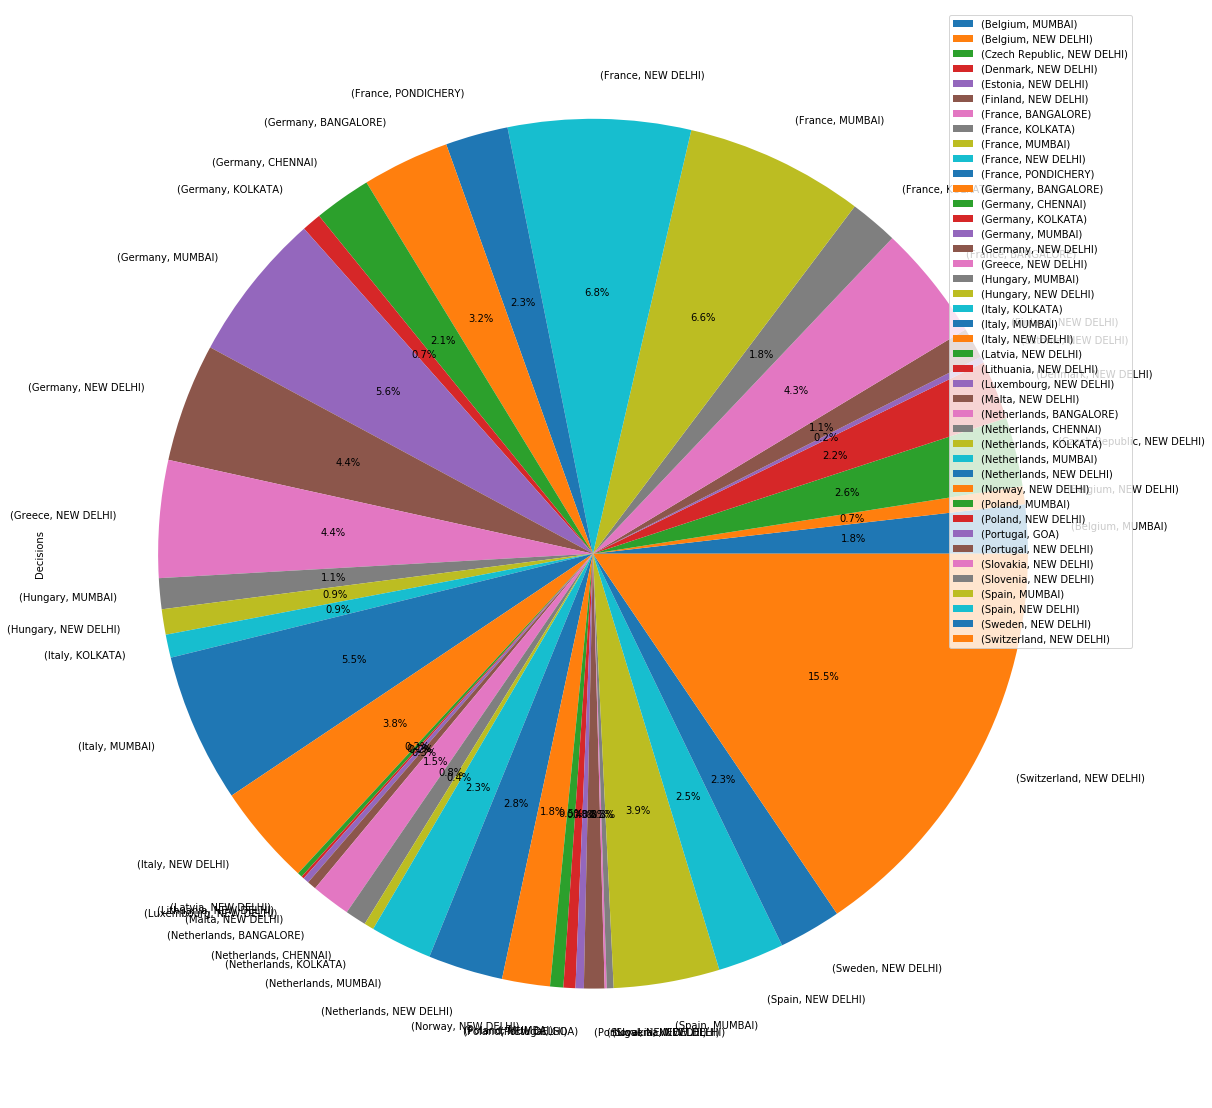

In [112]:
tempdf = df_India.set_index(['Schengen_State','Consulate'])       
tempdf.plot.pie(y = 'Decisions', figsize = (20,20),autopct = '%1.1f%%')

#### Rejection rate (if you have a weak visa application)

In [113]:
calculatePValue(df_India,'Uniform_visas_not_issued','Decisions')

0.09516950668161513
Rejects the Null Hypothesis: 
['Belgium, MUMBAI', 'Belgium, NEW DELHI', 'Czech Republic, NEW DELHI', 'Denmark, NEW DELHI', 'Estonia, NEW DELHI', 'Finland, NEW DELHI', 'France, BANGALORE', 'France, KOLKATA', 'France, MUMBAI', 'France, NEW DELHI', 'France, PONDICHERY', 'Germany, BANGALORE', 'Germany, CHENNAI', 'Germany, KOLKATA', 'Germany, MUMBAI', 'Germany, NEW DELHI', 'Greece, NEW DELHI', 'Hungary, MUMBAI', 'Hungary, NEW DELHI', 'Italy, KOLKATA', 'Italy, MUMBAI', 'Italy, NEW DELHI', 'Latvia, NEW DELHI', 'Lithuania, NEW DELHI', 'Luxembourg, NEW DELHI', 'Malta, NEW DELHI', 'Netherlands, BANGALORE', 'Netherlands, CHENNAI', 'Netherlands, KOLKATA', 'Netherlands, MUMBAI', 'Netherlands, NEW DELHI', 'Norway, NEW DELHI', 'Poland, NEW DELHI', 'Portugal, NEW DELHI', 'Slovakia, NEW DELHI', 'Slovenia, NEW DELHI', 'Spain, MUMBAI', 'Spain, NEW DELHI', 'Sweden, NEW DELHI', 'Switzerland, NEW DELHI']
Fails to Reject the Null Hypothesis: 
['Poland, MUMBAI', 'Portugal, GOA']


#### Multi-Entry Visa Share (if you have a strong visa application)

In [114]:
calculatePValue(df_India,'Multiple_entry_uniform_visas_(MEVs)_issued','Total_uniform_visas_issued_(including_MEV)')

0.5926509923586152
Rejects the Null Hypothesis: 
['Belgium, MUMBAI', 'Belgium, NEW DELHI', 'Czech Republic, NEW DELHI', 'Denmark, NEW DELHI', 'Estonia, NEW DELHI', 'Finland, NEW DELHI', 'France, BANGALORE', 'France, KOLKATA', 'France, MUMBAI', 'France, NEW DELHI', 'France, PONDICHERY', 'Germany, BANGALORE', 'Germany, CHENNAI', 'Germany, KOLKATA', 'Germany, MUMBAI', 'Germany, NEW DELHI', 'Greece, NEW DELHI', 'Hungary, MUMBAI', 'Hungary, NEW DELHI', 'Italy, KOLKATA', 'Italy, MUMBAI', 'Italy, NEW DELHI', 'Latvia, NEW DELHI', 'Luxembourg, NEW DELHI', 'Malta, NEW DELHI', 'Netherlands, BANGALORE', 'Netherlands, CHENNAI', 'Netherlands, KOLKATA', 'Netherlands, MUMBAI', 'Netherlands, NEW DELHI', 'Norway, NEW DELHI', 'Poland, MUMBAI', 'Poland, NEW DELHI', 'Portugal, GOA', 'Portugal, NEW DELHI', 'Slovakia, NEW DELHI', 'Slovenia, NEW DELHI', 'Spain, MUMBAI', 'Spain, NEW DELHI', 'Sweden, NEW DELHI', 'Switzerland, NEW DELHI']
Fails to Reject the Null Hypothesis: 
['Lithuania, NEW DELHI']


#### Weighted Score: You are required to calculate a normalized engineered feature

In [115]:
calculatePValuewithWeightedScore(df_India,'Uniform_visas_not_issued','Decisions','Multiple_entry_uniform_visas_(MEVs)_issued','Total_uniform_visas_issued_(including_MEV)')

[[0.8403574639098937], [0.5805475504322767], [0.07630868456577171], [0.8268328667697668], [0.40657196200990336], [0.6607102727128851], [0.10682985070167886], [0.12200458984896194], [0.14337581184094428], [0.10312827363541087], [0.07824112303881091], [0.7611486174535999], [0.7499346314646524], [0.9422435640923036], [0.7377365928498903], [0.8590470543688229], [0.8848282681058706], [0.9292102621536887], [0.2589076059213885], [0.8853211009174312], [0.891784299478868], [0.7319353052736013], [0.1017456949591407], [0.3591291711053776], [0.8585194918966272], [0.2520948490033579], [0.8409978164494144], [0.8361380665765877], [0.8279541210989597], [0.8898280262772501], [0.7698303428277735], [0.1387164161976062], [0.588006877408483], [0.2639110797954474], [0.022376975672284527], [0.2811560817413445], [0.31472145911807187], [0.7872881310269392], [0.009998057418253258], [0.03166567936588846], [0.37483718901415497], [0.7290031760793163]]
Rejects the Null Hypothesis: 
['Belgium, MUMBAI', 'Belgium, NEW

# JAPAN

In [116]:
df_Japan = df[df['Country_where_consulate_is_located'] == 'JAPAN']
df_Japan

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total_uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,Decisions,Rejected (%)
25,Austria,JAPAN,TOKYO,543,543,38,7.0%,0,0,0%,543,0.00
102,Belgium,JAPAN,TOKYO,338,311,183,58.8%,0,15,4.4%,326,4.60
184,Czech Republic,JAPAN,TOKYO,345,345,31,9.0%,0,0,0%,345,0.00
259,Denmark,JAPAN,TOKYO,321,321,27,8.4%,0,2,0.6%,323,0.62
301,Estonia,JAPAN,TOKYO,46,45,16,35.6%,0,1,2.2%,46,2.17
334,Finland,JAPAN,TOKYO,401,373,61,16.4%,14,12,3.0%,399,3.01
455,France,JAPAN,TOKYO,2753,2592,682,26.3%,2,107,3.9%,2701,3.96
612,Germany,JAPAN,OSAKA,828,811,507,62.5%,2,15,1.8%,828,1.81
613,Germany,JAPAN,TOKYO,1816,1814,1810,99.8%,2,0,0%,1816,0.00
753,Greece,JAPAN,TOKYO,408,398,171,43.0%,0,10,2.5%,408,2.45


#### Pie Chart Of Consulate Decisions

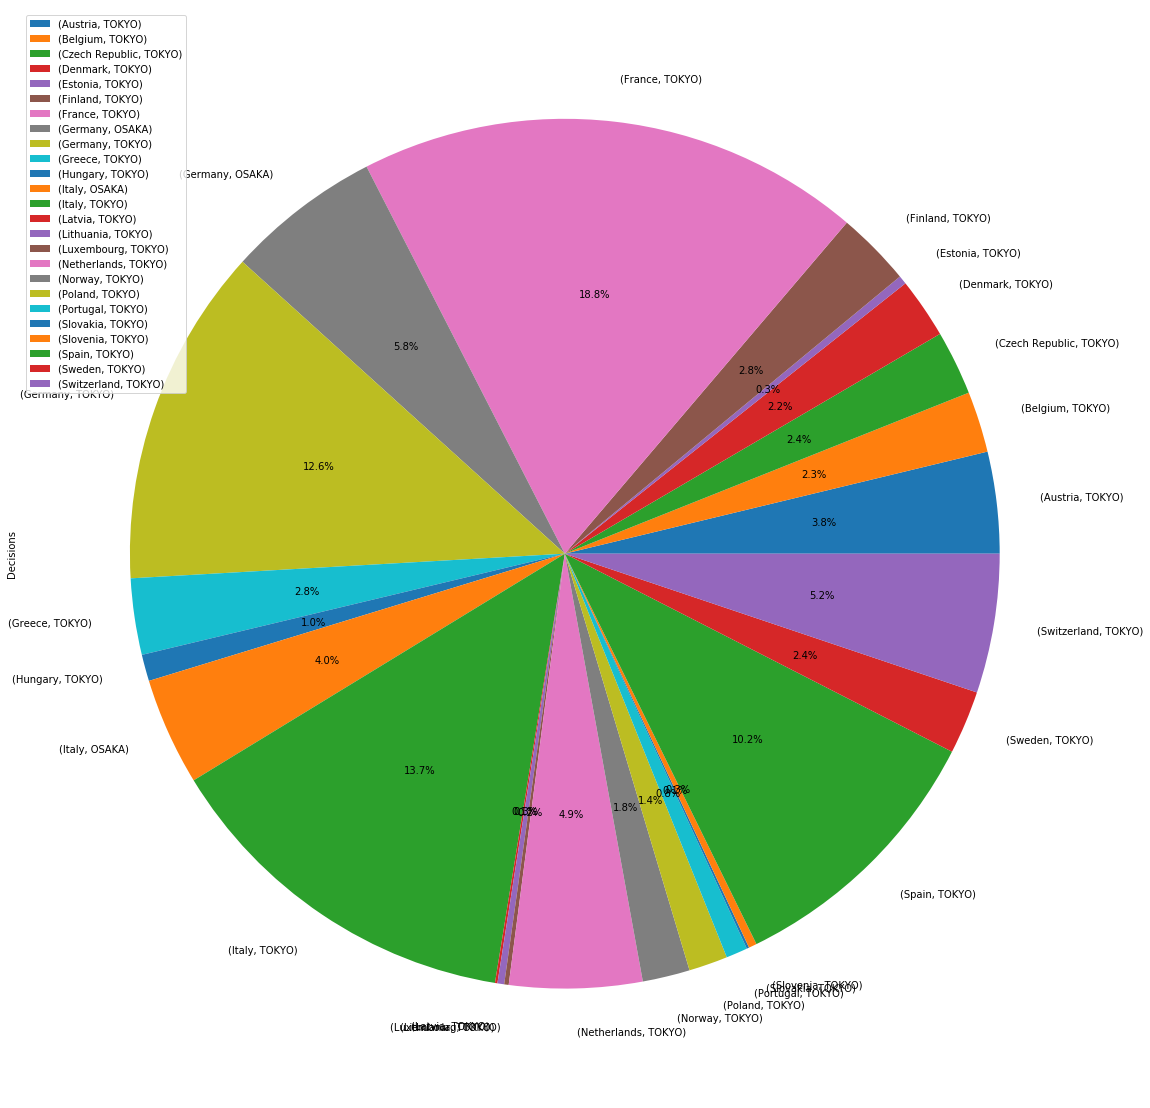

In [117]:
tempdf = df_Japan.set_index(['Schengen_State','Consulate'])       
tempdf.plot.pie(y = 'Decisions', figsize = (20,20),autopct = '%1.1f%%')

#### Rejection rate (if you have a weak visa application)

In [118]:
calculatePValue(df_Japan,'Uniform_visas_not_issued','Decisions')

0.023412532999861055
Rejects the Null Hypothesis: 
['Austria, TOKYO', 'Czech Republic, TOKYO', 'Denmark, TOKYO', 'France, TOKYO', 'Germany, TOKYO', 'Italy, OSAKA', 'Italy, TOKYO', 'Latvia, TOKYO', 'Netherlands, TOKYO', 'Slovakia, TOKYO', 'Spain, TOKYO']
Fails to Reject the Null Hypothesis: 
['Belgium, TOKYO', 'Estonia, TOKYO', 'Finland, TOKYO', 'Germany, OSAKA', 'Greece, TOKYO', 'Hungary, TOKYO', 'Lithuania, TOKYO', 'Luxembourg, TOKYO', 'Norway, TOKYO', 'Poland, TOKYO', 'Portugal, TOKYO', 'Slovenia, TOKYO', 'Sweden, TOKYO', 'Switzerland, TOKYO']


#### Multi-Entry Visa Share (if you have a strong visa application)

In [119]:
calculatePValue(df_Japan,'Multiple_entry_uniform_visas_(MEVs)_issued','Total_uniform_visas_issued_(including_MEV)')

0.548060467769538
Rejects the Null Hypothesis: 
['Austria, TOKYO', 'Czech Republic, TOKYO', 'Denmark, TOKYO', 'Finland, TOKYO', 'France, TOKYO', 'Germany, OSAKA', 'Germany, TOKYO', 'Greece, TOKYO', 'Hungary, TOKYO', 'Italy, OSAKA', 'Italy, TOKYO', 'Latvia, TOKYO', 'Lithuania, TOKYO', 'Luxembourg, TOKYO', 'Netherlands, TOKYO', 'Norway, TOKYO', 'Poland, TOKYO', 'Portugal, TOKYO', 'Spain, TOKYO', 'Switzerland, TOKYO']
Fails to Reject the Null Hypothesis: 
['Belgium, TOKYO', 'Estonia, TOKYO', 'Slovakia, TOKYO', 'Slovenia, TOKYO', 'Sweden, TOKYO']


#### Weighted Score: You are required to calculate a normalized engineered feature

In [120]:
calculatePValuewithWeightedScore(df_Japan,'Uniform_visas_not_issued','Decisions','Multiple_entry_uniform_visas_(MEVs)_issued','Total_uniform_visas_issued_(including_MEV)')

[[0.06998158379373849], [0.5613496932515337], [0.08985507246376812], [0.08359133126934984], [0.3478260869565218], [0.15862041161885948], [0.2526939039496117], [0.6138288747118426], [0.9977949283351709], [0.4191176470588235], [0.29577464788732394], [1.0], [0.9979726305119108], [0.0], [0.16666666666666666], [0.08712121212121213], [0.9253330509372021], [0.12648221343873517], [0.10146888287591806], [0.0], [0.23076923076923078], [0.5348837209302326], [0.006122448979591836], [0.4762721238938053], [0.8938172043010753]]
Rejects the Null Hypothesis: 
['Austria, TOKYO', 'Belgium, TOKYO', 'Czech Republic, TOKYO', 'Denmark, TOKYO', 'Finland, TOKYO', 'France, TOKYO', 'Germany, OSAKA', 'Germany, TOKYO', 'Italy, OSAKA', 'Italy, TOKYO', 'Latvia, TOKYO', 'Lithuania, TOKYO', 'Luxembourg, TOKYO', 'Netherlands, TOKYO', 'Norway, TOKYO', 'Poland, TOKYO', 'Portugal, TOKYO', 'Spain, TOKYO', 'Sweden, TOKYO', 'Switzerland, TOKYO']
Fails to Reject the Null Hypothesis: 
['Estonia, TOKYO', 'Greece, TOKYO', 'Hungar

- After doing analysis on looking at those that were rejected or accepted, we can see that the most of the countries have an embassy and have good foreign relations which is why it is better to apply for visas through the consulate than the country
- We can see that these P Values are v small that even with a alpha value of 0.005 most of our consulates reject the null hypothesis which I have mentioned above and if we choose a 0.05 alpha value then almost all consulates reject the null hypothesis
- From the results across all three countries we can say with statistical significance that applying for visa through consulates has a much better chance than simply from the country